In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [15]:
# Generic PRBS generator

def prbs_generator(N, taps, initial_value=None, phase=0):
    output = np.zeros(N)
    nbits = int(np.log2((N+1))) # N = 2^nbits - 1
    print(f"Number of bits: {nbits}")


    if initial_value is not None:
        seq_values = initial_value
    else:
        seq_values = np.ones(nbits, dtype=int)  # Initialize to ones unless an initial seq is given

    print(f"Initial sequence: {seq_values}")


    taps_array = np.array([int(bit) for bit in format(taps, f'0{nbits}b')]) # convert hex to binary
    print(f"Taps array: {taps_array}")
    ones_indices = np.where(taps_array == 1)[0]  
    print(f"Ones indices: {ones_indices}")

    # find which bits in our sequence to XOR
    # We're using LSB to XOR, so need to pick from the end of the sequence instead of the beginning

    n_taps = len(ones_indices)
    xor_indices = [nbits-1-ones_indices[i] for i in range(n_taps)] # if total number of bits is N, we subtract the index from N-1 to get corresponding LSB
    print(f"Xor indices: {xor_indices}")

    # print(seq_values[xor_indices]) # this works, we get [1 1], which are the values at the indices we need to XOR

    for i in range(N):
        # For output, take the LSB of the sequence
        output[i] = seq_values[-1]
        # print(f"Output at index {i}: {output[i]}")

        # Compute XOR operation for the given indices

        vals_to_xor = seq_values[xor_indices]
        xor_result = np.bitwise_xor.reduce(vals_to_xor)
        # print(f"Xor result: {xor_result}")

        # shift register

        seq_values = np.roll(seq_values, 1) # shift to the right by 1 bit
        seq_values[0] = xor_result # xor result goes to the MSB
        # print(f"Sequence values: {seq_values}")

    

    if phase != 0:
        output = np.roll(output, phase)

    print(f"Final output: {output}")

    return output

taps_prbs7 = 0x6
taps_prbs15 = 0xC
taps_prbs127 = 0x60
taps_prbs511 = 0x110
taps_prbs1023 = 0x240


prbs511 = prbs_generator(511, taps_prbs511)

Number of bits: 9
Initial sequence: [1 1 1 1 1 1 1 1 1]
Taps array: [1 0 0 0 1 0 0 0 0]
Ones indices: [0 4]
Xor indices: [np.int64(8), np.int64(4)]
Final output: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0

In [16]:
prbs511_phase = prbs_generator(511, taps_prbs511, phase=10)

Number of bits: 9
Initial sequence: [1 1 1 1 1 1 1 1 1]
Taps array: [1 0 0 0 1 0 0 0 0]
Ones indices: [0 4]
Xor indices: [np.int64(8), np.int64(4)]
Final output: [1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0

Number of bits: 9
Initial sequence: [1 1 1 1 1 1 1 1 1]
Taps array: [1 0 0 0 1 0 0 0 0]
Ones indices: [0 4]
Xor indices: [np.int64(8), np.int64(4)]
Final output: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0

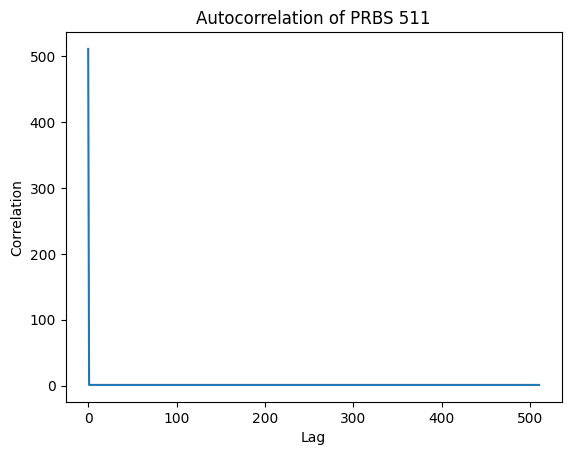

In [17]:
# Question 1 part b) - Plotting autocorrelation

prbs_511_output = prbs_generator(511, taps_prbs511)

prbs_511_mapped = 2 * prbs_511_output - 1 # mapped from -1 to + 1

# autocorr_prbs511 = np.correlate(prbs_511_mapped, prbs_511_mapped, mode='full') # this does not produce all zeros!!!

# this function works better than the above! but why?
def corr(array_1, array_2, N, plot='n', title=None):
    corr_array = [0]* N
    for n in range(0, N):
        corr_array[n] = np.abs((np.sum(array_1 * (np.roll(array_2,n)))))
    
    if plot == 'y':
        plt.plot(corr_array)
        if title is not None:
            plt.title(title)
        plt.xlabel('Lag')
        plt.ylabel('Correlation')
        plt.show()

    return corr_array

prbs_511_autocorr = corr(prbs_511_mapped,prbs_511_mapped,511, plot='y',title='Autocorrelation of PRBS 511')
